In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
plt.style.use('seaborn')
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Column descriptions for reference
#id - unique identified for a house
#dateDate - house was sold
#pricePrice - is prediction target
#bedroomsNumber - of Bedrooms/House
#bathroomsNumber - of bathrooms/bedrooms
#sqft_livingsquare - footage of the home
#sqft_lotsquare - footage of the lot
#floorsTotal - floors (levels) in house
#waterfront - House which has a view to a waterfront
#view - Has been viewed/ how many times viewed?
#condition - How good the condition is ( Overall )
#grade - overall grade given to the housing unit, based on King County grading system
#sqft_above - square footage of house apart from basement
#sqft_basement - square footage of the basement
#yr_built - Built Year
#yr_renovated - Year when house was renovated
#zipcode - zip
#lat - Latitude coordinate
#long - Longitude coordinate
#sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
#sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [3]:
data = pd.read_csv('kc_house_data.csv')
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

## Looking at the dataset ##

In [4]:
data.tail()

id        date     price  bedrooms  bathrooms  sqft_living  \
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
21592      1131     3.0         0.0   0.0  ...      8        1530   
21593      5813     2.0         0.0   0.0  ...      8        2310   
21594      1350     2.0         0.0   0.0  ...      7        1020   
21595      2388     2.0         NaN   0.0  ...      8        1600   
21596      1076     2.0         0.0   0.0  ...      7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[5 rows x 21 columns]

In [5]:
display(data.info())
display(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Dropping Values & Editing Columns##


#### Looks like the NaN values for waterfront, view, and yr_renovated can be replaced with other values. 
#### - waterfront replaced with 0
#### - view replaced with 0
#### - yr_renovated replaced with yr_built as it may not have ever been renovated

In [6]:
data['waterfront'] = data['waterfront'].fillna(0)
data['view'] = data['view'].fillna(0)
data['yr_renovated'] = data['yr_renovated'].replace(0, np.nan)
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         0.0   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           NaN    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           NaN    98136  47.5208 -122.393           1360        5000  
4     1987           NaN    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [7]:
data['yr_renovated'] = data['yr_renovated'].fillna(data['yr_built'])
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         0.0   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955        1955.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933        1933.0    98028  47.7379 -122.233           2720        8062  
3     1965        1965.0    98136  47.5208 -122.393           1360        5000  
4     1987        1987.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [8]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
#sorting by date
data = data.sort_values(by = 'date', ascending =False)
display(data.head())
display(data.tail())

id      date      price  bedrooms  bathrooms  sqft_living  \
1013    342000570  9/9/2014   429000.0         2       1.00         1080   
9932   7779200075  9/9/2014   689000.0         2       1.75         2330   
17592  7954300740  9/9/2014   527000.0         4       2.50         2830   
18353  1370803445  9/9/2014  1140000.0         4       1.75         3080   
8113   4006000183  9/9/2014   450000.0         7       4.00         3150   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1013       3600     1.0         0.0   0.0  ...      7        1080   
9932      10143     1.0         0.0   2.0  ...      7        1220   
17592      6163     2.0         0.0   0.0  ...      9        2830   
18353      6500     1.0         0.0   0.0  ...      9        1700   
8113       7800     2.0         0.0   0.0  ...      8        3150   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
1013             0.0     1922        1922.0    98122  47.6078 -122.291   
9932          1110.0     1953        1953.0    98146  47.4899 -122.359   
17592            0.0     2000        2000.0    98056  47.5227 -122.190   
18353         1380.0     1941        1941.0    98199  47.6353 -122.402   
8113             0.0     2013        2013.0    98118  47.5259 -122.279   

       sqft_living15  sqft_lot15  
1013            2230        4500  
9932            2560        9750  
17592           2730        6202  
18353           2960        5711  
8113            1880        6000  

[5 rows x 21 columns]

id       date     price  bedrooms  bathrooms  sqft_living  \
16071  1433290010  1/12/2015  449000.0         3       2.25         1960   
7946   8682282070  1/12/2015  920000.0         3       3.50         2800   
14571  6672900220  1/12/2015  984000.0         4       2.25         2390   
13533  5088500210  1/12/2015  415000.0         4       2.75         2390   
12076  5437600140  1/10/2015  325000.0         4       2.50         2240   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
16071     44634     1.0         0.0   0.0  ...      7        1130   
7946       7694     1.0         0.0   0.0  ...      9        2800   
14571     12292     1.0         0.0   0.0  ...      9        2390   
13533      9968     1.0         0.0   0.0  ...      9        1390   
12076      5105     2.0         0.0   0.0  ...      8        2240   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
16071          830.0     1984        1984.0    98028  47.7769 -122.253   
7946             0.0     2005        2005.0    98053  47.7095 -122.022   
14571            0.0     1962        1962.0    98040  47.5528 -122.221   
13533         1000.0     1989        1989.0    98038  47.3706 -122.056   
12076            0.0     2002        2002.0    98042  47.3922 -122.165   

       sqft_living15  sqft_lot15  
16071           1970       44634  
7946            2420        7694  
14571           2870       12337  
13533           2560       12385  
12076           1920        5288  

[5 rows x 21 columns]

In [10]:
data['date'] = pd.to_datetime(data['date'])

In [11]:
for column in data:
    unique_vals = np.unique(data[column])
    num_values = len(unique_vals)
    if num_values < 30:
        print('The number of values for feature {} :{} -- {}'.format(column, num_values, unique_vals))
    else:
        print('The number of values for feature {} : {}'.format(column, num_values))

The number of values for feature id : 21420
The number of values for feature date : 372
The number of values for feature price : 3622
The number of values for feature bedrooms :12 -- [ 1  2  3  4  5  6  7  8  9 10 11 33]
The number of values for feature bathrooms :29 -- [0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75
 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.5  7.75
 8.  ]
The number of values for feature sqft_living : 1034
The number of values for feature sqft_lot : 9776
The number of values for feature floors :6 -- [1.  1.5 2.  2.5 3.  3.5]
The number of values for feature waterfront :2 -- [0. 1.]
The number of values for feature view :5 -- [0. 1. 2. 3. 4.]
The number of values for feature condition :5 -- [1 2 3 4 5]
The number of values for feature grade :11 -- [ 3  4  5  6  7  8  9 10 11 12 13]
The number of values for feature sqft_above : 942
The number of values for feature sqft_basement : 304
The number of values for feature yr_built :

In [12]:
bed = data[data['bedrooms'] == 33]
bed.head()
#33 bedrooms and 1.75 bathrooms seems a bit off. Maybe a data entry issue

id       date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895 2014-06-25  640000.0        33       1.75         1620   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
15856      6000     1.0         0.0   0.0  ...      7        1040   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
15856          580.0     1947        1947.0    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
15856           1330        4700  

[1 rows x 21 columns]

In [13]:
data.loc[data.sqft_basement == '?', 'sqft_basement'].count()
#how many '?'s in the sqft_basement column

454

In [14]:
data['sqft_basement'] = data['sqft_basement'].replace('?', np.nan)
data.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
1013    342000570 2014-09-09   429000.0         2       1.00         1080   
9932   7779200075 2014-09-09   689000.0         2       1.75         2330   
17592  7954300740 2014-09-09   527000.0         4       2.50         2830   
18353  1370803445 2014-09-09  1140000.0         4       1.75         3080   
8113   4006000183 2014-09-09   450000.0         7       4.00         3150   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1013       3600     1.0         0.0   0.0  ...      7        1080   
9932      10143     1.0         0.0   2.0  ...      7        1220   
17592      6163     2.0         0.0   0.0  ...      9        2830   
18353      6500     1.0         0.0   0.0  ...      9        1700   
8113       7800     2.0         0.0   0.0  ...      8        3150   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
1013             0.0     1922        1922.0    98122  47.6078 -122.291   
9932          1110.0     1953        1953.0    98146  47.4899 -122.359   
17592            0.0     2000        2000.0    98056  47.5227 -122.190   
18353         1380.0     1941        1941.0    98199  47.6353 -122.402   
8113             0.0     2013        2013.0    98118  47.5259 -122.279   

       sqft_living15  sqft_lot15  
1013            2230        4500  
9932            2560        9750  
17592           2730        6202  
18353           2960        5711  
8113            1880        6000  

[5 rows x 21 columns]

In [15]:
data.loc[data.sqft_basement == '?', 'sqft_basement'].count()

0

In [16]:
data['sqft_basement'] = data['sqft_basement'].fillna(0)
data.loc[data.sqft_basement == '?', 'sqft_basement'].count()
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [ ]:
#after checking there are now no more '?' in sqft_basement and is replaced with a 0

In [17]:
data.duplicated().sum() #no duplicated values

0

In [18]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [19]:
data.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated       116
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

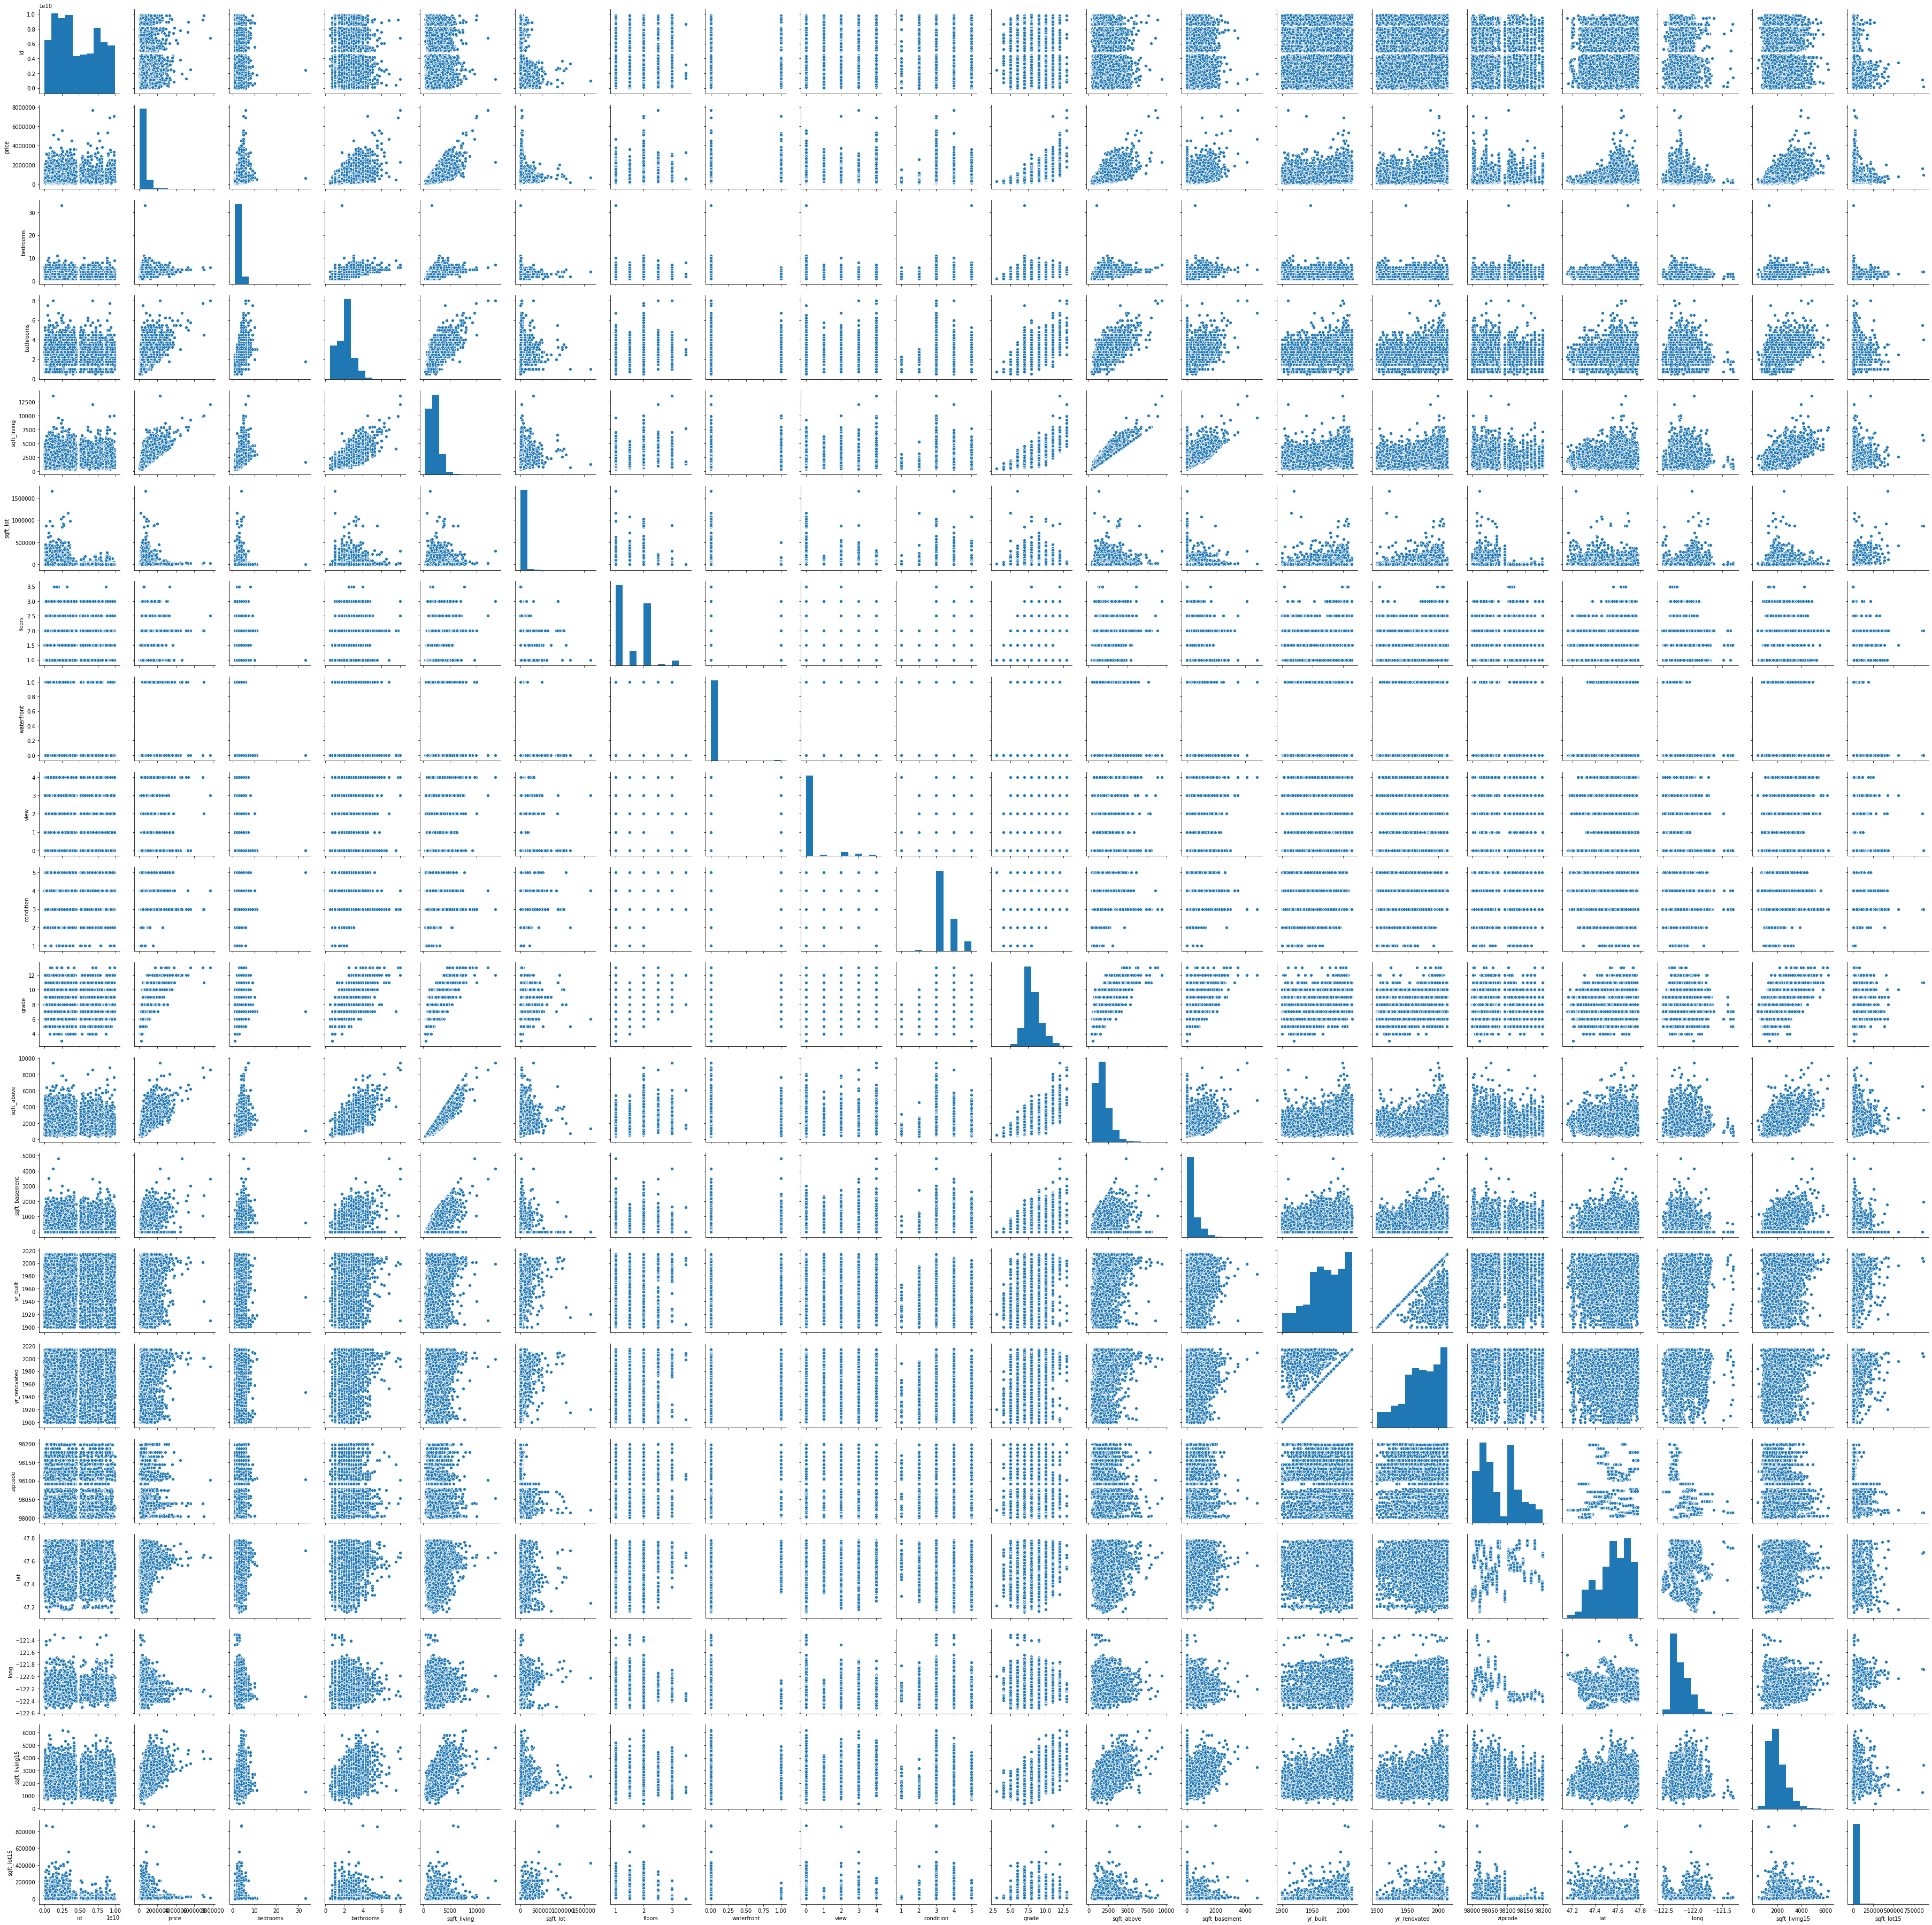

In [26]:
p = sns.pairplot(data)

In [ ]:
## saving zipcode, lat, and long into a seperate dataframe for later

In [20]:
location = data[['price', 'bedrooms', 'bathrooms', 'zipcode', 'lat', 'long']]
location.head()

price  bedrooms  bathrooms  zipcode      lat     long
1013    429000.0         2       1.00    98122  47.6078 -122.291
9932    689000.0         2       1.75    98146  47.4899 -122.359
17592   527000.0         4       2.50    98056  47.5227 -122.190
18353  1140000.0         4       1.75    98199  47.6353 -122.402
8113    450000.0         7       4.00    98118  47.5259 -122.279

In [20]:
location.to_csv('location.csv', index = False)

In [21]:
#removing lat, long, zipcode from dataframe since i have it stored elsewhere and it is not necessary for modeling
data = data[['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
              'sqft_living15', 'sqft_lot15']]

## Normalizing

In [22]:
def norm_feat(series):
    return(series-series.mean())/series.std()
for feat in ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']:
    data[feat] = norm_feat(data[feat])
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  2.159700e+04  2.159700e+04  2.159700e+04   
mean   4.580474e+09  5.402966e+05 -2.296425e-16  1.190982e-16 -1.414703e-16   
std    2.876736e+09  3.673681e+05  1.000000e+00  1.000000e+00  1.000000e+00   
min    1.000102e+06  7.800000e+04 -2.562024e+00 -2.101247e+00 -1.862880e+00   
25%    2.123049e+09  3.220000e+05 -4.028937e-01 -4.757266e-01 -7.083297e-01   
50%    3.904930e+09  4.500000e+05 -4.028937e-01  1.744818e-01 -1.855143e-01   
75%    7.308900e+09  6.450000e+05  6.766715e-01  4.995859e-01  5.115728e-01   
max    9.900000e+09  7.700000e+06  3.198406e+01  7.651878e+00  1.248187e+01   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  2.159700e+04  2.159700e+04  2.159700e+04  2.159700e+04   
mean   1.184402e-17 -1.214012e-16  3.290007e-18  2.105604e-17  1.329163e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -3.520522e-01 -9.155311e-01 -8.249784e-02 -3.049417e-01 -3.704314e+00   
25%   -2.429067e-01 -9.155311e-01 -8.249784e-02 -3.049417e-01 -6.299719e-01   
50%   -1.806552e-01  1.093901e-02 -8.249784e-02 -3.049417e-01 -6.299719e-01   
75%   -1.065957e-01  9.374092e-01 -8.249784e-02 -3.049417e-01  9.071993e-01   
max    3.951112e+01  3.716820e+00  1.212097e+01  4.926055e+00  2.444371e+00   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  2.159700e+04  2.159700e+04   2.159700e+04  21597.000000  21597.000000   
mean   3.934848e-16  3.470957e-17   2.599105e-17   1970.999676   1972.945131   
std    1.000000e+00  1.000000e+00   1.000000e+00     29.375234     28.945393   
min   -3.970267e+00 -1.713778e+00  -6.496219e-01   1900.000000   1900.000000   
25%   -5.607873e-01 -7.231529e-01  -6.496219e-01   1951.000000   1954.000000   
50%   -5.607873e-01 -2.761633e-01  -6.496219e-01   1975.000000   1977.000000   
75%    2.915825e-01  5.090887e-01   6.008902e-01   1997.000000   1999.000000   
max    4.553432e+00  9.207265e+00   1.030941e+01   2015.000000   2015.000000   

       sqft_living15    sqft_lot15  
count   2.159700e+04  2.159700e+04  
mean    1.342323e-16  1.735479e-17  
std     1.000000e+00  1.000000e+00  
min    -2.316914e+00 -4.439058e-01  
25%    -7.247493e-01 -2.807861e-01  
50%    -2.139723e-01 -1.883919e-01  
75%     5.448965e-01 -9.808756e-02  
max     6.163444e+00  3.147422e+01

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 1013 to 12076
Data columns (total 18 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null float64
bathrooms        21597 non-null float64
sqft_living      21597 non-null float64
sqft_lot         21597 non-null float64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null float64
grade            21597 non-null float64
sqft_above       21597 non-null float64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
sqft_living15    21597 non-null float64
sqft_lot15       21597 non-null float64
dtypes: datetime64[ns](1), float64(15), int64(2)
memory usage: 3.1 MB


In [24]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [33]:
data.to_csv('cleaned_data.csv', index = False) 

In [25]:
feats = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']
data = data[feats]
data = pd.get_dummies(data, drop_first = True)
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
1013    429000.0 -1.482459  -1.451039    -1.089549 -0.277679 -0.915531   
9932    689000.0 -1.482459  -0.475727     0.271949 -0.119683 -0.915531   
17592   527000.0  0.676671   0.499586     0.816548 -0.215789  0.937409   
18353  1140000.0  0.676671  -0.475727     1.088848 -0.207652 -0.915531   
8113    450000.0  3.915367   2.450211     1.165092 -0.176260  0.937409   

       waterfront      view  condition     grade  sqft_above  sqft_basement  \
1013    -0.082498 -0.304942  -0.629972 -0.560787   -0.856042      -0.649622   
9932    -0.082498  2.310557   0.907199 -0.560787   -0.686910       1.874139   
17592   -0.082498 -0.304942  -0.629972  1.143952    1.258098      -0.649622   
18353   -0.082498 -0.304942   0.907199  1.143952   -0.107032       2.488027   
8113    -0.082498 -0.304942  -0.629972  0.291583    1.644684      -0.649622   

       yr_built  yr_renovated  sqft_living15  sqft_lot15  
1013       1922        1922.0       0.355179   -0.302785  
9932       1953        1953.0       0.836769   -0.110297  
17592      2000        2000.0       1.084861   -0.240382  
18353      1941        1941.0       1.420514   -0.258384  
8113       2013        2013.0      -0.155598   -0.247788

## Exploring Cleaned Data

In [26]:
df = pd.read_csv('cleaned_data.csv')
df.head()

id        date      price  bedrooms  bathrooms  sqft_living  \
0   342000570  2014-09-09   429000.0 -1.482459  -1.451039    -1.089549   
1  7779200075  2014-09-09   689000.0 -1.482459  -0.475727     0.271949   
2  7954300740  2014-09-09   527000.0  0.676671   0.499586     0.816548   
3  1370803445  2014-09-09  1140000.0  0.676671  -0.475727     1.088848   
4  4006000183  2014-09-09   450000.0  3.915367   2.450211     1.165092   

   sqft_lot    floors  waterfront      view  condition     grade  sqft_above  \
0 -0.277679 -0.915531   -0.082498 -0.304942  -0.629972 -0.560787   -0.856042   
1 -0.119683 -0.915531   -0.082498  2.310557   0.907199 -0.560787   -0.686910   
2 -0.215789  0.937409   -0.082498 -0.304942  -0.629972  1.143952    1.258098   
3 -0.207652 -0.915531   -0.082498 -0.304942   0.907199  1.143952   -0.107032   
4 -0.176260  0.937409   -0.082498 -0.304942  -0.629972  0.291583    1.644684   

   sqft_basement  yr_built  yr_renovated  sqft_living15  sqft_lot15  
0      -0.649622      1922        1922.0       0.355179   -0.302785  
1       1.874139      1953        1953.0       0.836769   -0.110297  
2      -0.649622      2000        2000.0       1.084861   -0.240382  
3       2.488027      1941        1941.0       1.420514   -0.258384  
4      -0.649622      2013        2013.0      -0.155598   -0.247788

In [27]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  2.159700e+04  2.159700e+04  2.159700e+04   
mean   4.580474e+09  5.402966e+05 -2.118764e-16  9.212019e-17 -1.460763e-16   
std    2.876736e+09  3.673681e+05  1.000000e+00  1.000000e+00  1.000000e+00   
min    1.000102e+06  7.800000e+04 -2.562024e+00 -2.101247e+00 -1.862880e+00   
25%    2.123049e+09  3.220000e+05 -4.028937e-01 -4.757266e-01 -7.083297e-01   
50%    3.904930e+09  4.500000e+05 -4.028937e-01  1.744818e-01 -1.855143e-01   
75%    7.308900e+09  6.450000e+05  6.766715e-01  4.995859e-01  5.115728e-01   
max    9.900000e+09  7.700000e+06  3.198406e+01  7.651878e+00  1.248187e+01   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  2.159700e+04  2.159700e+04  2.159700e+04  2.159700e+04   
mean   1.316003e-17 -1.585783e-16 -7.238015e-18  3.619007e-18  1.381803e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -3.520522e-01 -9.155311e-01 -8.249784e-02 -3.049417e-01 -3.704314e+00   
25%   -2.429067e-01 -9.155311e-01 -8.249784e-02 -3.049417e-01 -6.299719e-01   
50%   -1.806552e-01  1.093901e-02 -8.249784e-02 -3.049417e-01 -6.299719e-01   
75%   -1.065957e-01  9.374092e-01 -8.249784e-02 -3.049417e-01  9.071993e-01   
max    3.951112e+01  3.716820e+00  1.212097e+01  4.926055e+00  2.444371e+00   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  2.159700e+04  2.159700e+04   2.159700e+04  21597.000000  21597.000000   
mean   3.934848e-16  3.841083e-17   2.335905e-17   1970.999676   1972.945131   
std    1.000000e+00  1.000000e+00   1.000000e+00     29.375234     28.945393   
min   -3.970267e+00 -1.713778e+00  -6.496219e-01   1900.000000   1900.000000   
25%   -5.607873e-01 -7.231529e-01  -6.496219e-01   1951.000000   1954.000000   
50%   -5.607873e-01 -2.761633e-01  -6.496219e-01   1975.000000   1977.000000   
75%    2.915825e-01  5.090887e-01   6.008902e-01   1997.000000   1999.000000   
max    4.553432e+00  9.207265e+00   1.030941e+01   2015.000000   2015.000000   

       sqft_living15    sqft_lot15  
count   2.159700e+04  2.159700e+04  
mean    1.329163e-16  1.496953e-17  
std     1.000000e+00  1.000000e+00  
min    -2.316914e+00 -4.439058e-01  
25%    -7.247493e-01 -2.807861e-01  
50%    -2.139723e-01 -1.883919e-01  
75%     5.448965e-01 -9.808756e-02  
max     6.163444e+00  3.147422e+01

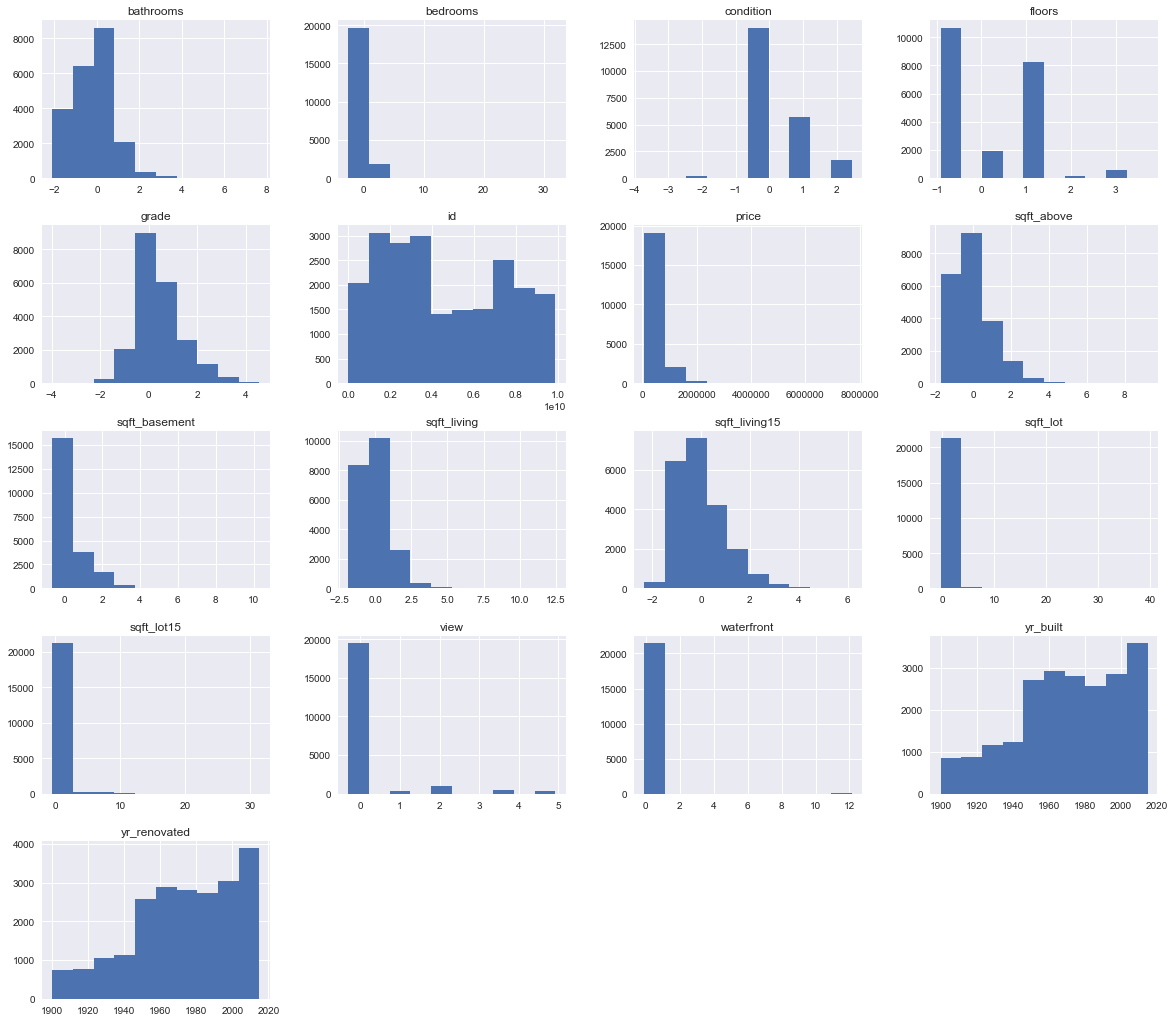

In [28]:
df.hist(figsize = (20,18));

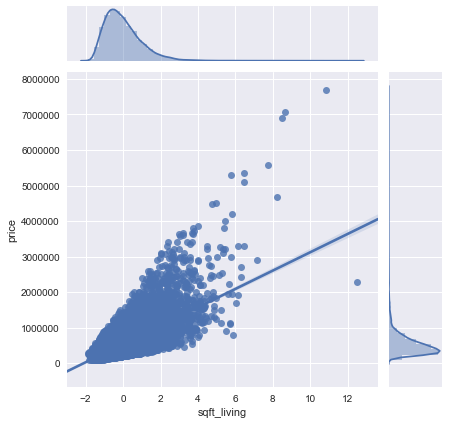

In [30]:
sns.jointplot('sqft_living','price', data=df, kind ='reg');

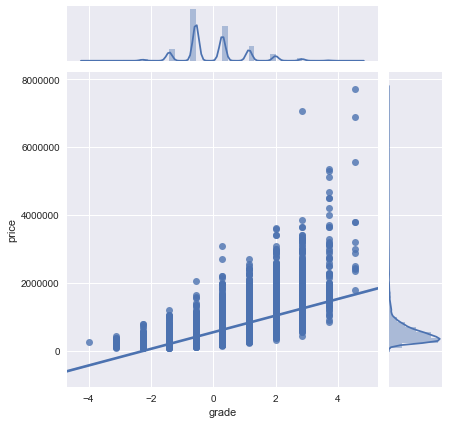

In [33]:
sns.jointplot('grade','price', data=df, kind ='reg');

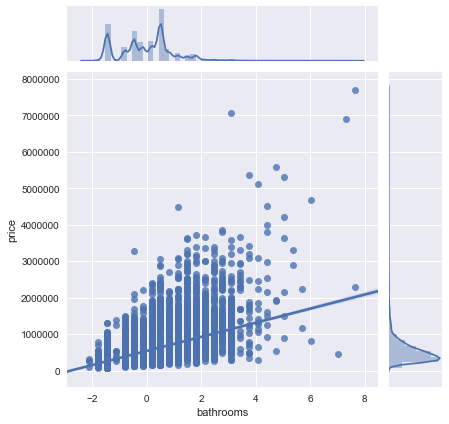

In [34]:
sns.jointplot('bathrooms','price', data=df, kind ='reg');

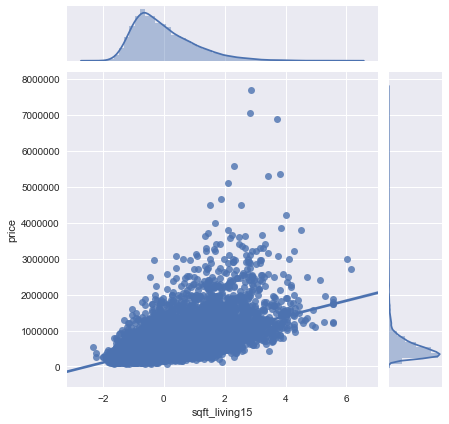

In [35]:
sns.jointplot('sqft_living15','price', data=df, kind ='reg');

### Checking for Multicollinearity

In [36]:
feats = ['bathrooms', 'sqft_living','sqft_lot', 'condition', 'grade','sqft_living15', 'sqft_lot15']
corr = df[feats].corr()
corr

bathrooms  sqft_living  sqft_lot  condition     grade  \
bathrooms       1.000000     0.755758  0.088373  -0.126479  0.665838   
sqft_living     0.755758     1.000000  0.173453  -0.059445  0.762779   
sqft_lot        0.088373     0.173453  1.000000  -0.008830  0.114731   
condition      -0.126479    -0.059445 -0.008830   1.000000 -0.146896   
grade           0.665838     0.762779  0.114731  -0.146896  1.000000   
sqft_living15   0.569884     0.756402  0.144763  -0.093072  0.713867   
sqft_lot15      0.088303     0.184342  0.718204  -0.003126  0.120981   

               sqft_living15  sqft_lot15  
bathrooms           0.569884    0.088303  
sqft_living         0.756402    0.184342  
sqft_lot            0.144763    0.718204  
condition          -0.093072   -0.003126  
grade               0.713867    0.120981  
sqft_living15       1.000000    0.183515  
sqft_lot15          0.183515    1.000000

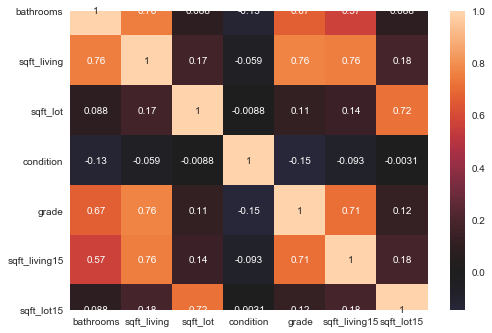

In [37]:
sns.heatmap(corr, center=0, annot=True);